1.Padding，填充操作，目的是经过卷积核处理过的矩阵和原来的图像矩阵一样大，一般是在外补上和步长一样的0。  
2.因为经过卷积核处理的矩阵不能保证像素值取值都在0-256之间，所以在卷积完成后，要进行归一化，然后乘256.  

### Sobel算子的原理  
卷积的操作特性——卷积操作可以计算出更过的局部信息。    
Sobel算子正是借助了卷积操作的特性，通过巧妙地权重设计来从图片的局部区域进行计算，将像素值变化的特征进行强化，生成了轮廓图片。    
图片经过算子卷积后的数据，本质上是该图片中的相隔像素之间的插值而已。如果将这个像素插值用图片的方式显示出来，就变成了轮廓的图片。  

## 7.3卷积神经网络的实现
窄卷积：生成的特征图比起原来的原始图片小，但是步长是可以发生变化的。   
如果滑动步长为S，原始图片的维度为$N_1*N_1$，则卷积核的大小为$N_2 * N_2$，那么卷积后的图像大小为$[(N_1-N_2)/S+1]*[(N_1-N_2)/S+1]$   
同卷积：卷积后的图片尺寸与原始的一样大，同卷积的步长是固定的，滑动步长为1.一般要使用padding操作。  
全卷积：又称为反卷积，把原始图片里的每个像素点都用卷积操作展开。同样要使用padding来进行操作，而且一般来说，生成的结果会比原有的图片尺寸大。  

In [1]:
import torch
input1 = torch.ones([1, 1, 5, 5])
input2 = torch.ones([1, 2, 5, 5])
input3 = torch.ones([1, 1, 4, 4])
input3

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [2]:
padding1 = torch.nn.functional.conv2d(input1,torch.ones([1,1,1,1]),stride=1,padding=(1))
print(padding1)
padding2 = torch.nn.functional.conv2d(input1,torch.ones([1,1,1,1]),stride=1,padding=(1,2))
print(padding2)

tensor([[[[0., 0., 0., 0., 0., 0., 0.],
          [0., 1., 1., 1., 1., 1., 0.],
          [0., 1., 1., 1., 1., 1., 0.],
          [0., 1., 1., 1., 1., 1., 0.],
          [0., 1., 1., 1., 1., 1., 0.],
          [0., 1., 1., 1., 1., 1., 0.],
          [0., 0., 0., 0., 0., 0., 0.]]]])
tensor([[[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 1., 1., 1., 1., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0.]]]])


In [3]:
filter1 =  torch.tensor([-1.0,0,0,-1]).reshape([1,1,2,2])
filter2 =  torch.tensor([-1.0,0,0,-1,-1.0,0,0,-1]).reshape([2,1,2, 2])
filter3 =  torch.tensor([-1.0,0,0,-1,-1.0,0,0,-1,-1.0,0,0,-1]).reshape([3,1,2, 2])
filter4 =  torch.tensor([-1.0,0,0,-1,-1.0,0,0,-1,
                                   -1.0,0,0,-1,
                                   -1.0,0,0,-1]).reshape([2, 2, 2, 2])
filter5 =  torch.tensor([-1.0,0,0,-1,-1.0,0,0,-1]).reshape([1,2, 2, 2])

In [4]:
op1 = torch.nn.functional.conv2d(input1, filter1, stride=2, padding=1) #1个通道输入，生成1个feature map
op2 = torch.nn.functional.conv2d(input1, filter2, stride=2, padding=1) #1个通道输入，生成2个feature map
op3 = torch.nn.functional.conv2d(input1, filter3, stride=2, padding=1) #1个通道输入，生成3个feature map

op4 = torch.nn.functional.conv2d(input2, filter4, stride=2, padding=1) # 2个通道输入，生成2个feature
op5 = torch.nn.functional.conv2d(input2, filter5, stride=2, padding=1) # 2个通道输入，生成一个feature map

op6 = torch.nn.functional.conv2d(input1, filter1, stride=2, padding=0) # 5*5 对于pading不同而不同
op1

tensor([[[[-1., -1., -1.],
          [-1., -2., -2.],
          [-1., -2., -2.]]]])

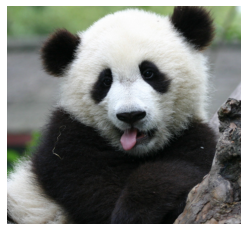

(864, 929, 4)


In [1]:
# 使用卷积提取图片的轮廓
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torchvision.transforms as transforms

myimg = mpimg.imread("Picture\img.png")
plt.imshow(myimg)
plt.axis('off')
plt.show()
print(myimg.shape)

In [13]:
"""把图片数据转化为张量"""
pic2tensor = transforms.ToTensor()  # 实例化ToTensor类
rgb_image = pic2tensor(myimg)
print(rgb_image[0][0])
print(rgb_image.shape)

tensor([0.4745, 0.4784, 0.4784, 0.4784, 0.4784, 0.4784, 0.4784, 0.4745, 0.4706,
        0.4706, 0.4706, 0.4706, 0.4706, 0.4706, 0.4706, 0.4706, 0.4706, 0.4667,
        0.4627, 0.4510, 0.4510, 0.4549, 0.4549, 0.4549, 0.4588, 0.4588, 0.4627,
        0.4667, 0.4706, 0.4706, 0.4706, 0.4706, 0.4745, 0.4745, 0.4745, 0.4745,
        0.4745, 0.4745, 0.4745, 0.4784, 0.4745, 0.4824, 0.4863, 0.4863, 0.4824,
        0.4745, 0.4745, 0.4745, 0.4706, 0.4706, 0.4706, 0.4745, 0.4745, 0.4745,
        0.4784, 0.4784, 0.4784, 0.4784, 0.4745, 0.4706, 0.4706, 0.4745, 0.4745,
        0.4784, 0.4745, 0.4667, 0.4667, 0.4667, 0.4667, 0.4706, 0.4706, 0.4706,
        0.4706, 0.4745, 0.4706, 0.4706, 0.4667, 0.4667, 0.4667, 0.4667, 0.4627,
        0.4588, 0.4510, 0.4471, 0.4471, 0.4431, 0.4392, 0.4353, 0.4353, 0.4275,
        0.4235, 0.4157, 0.4157, 0.4118, 0.4118, 0.4078, 0.4000, 0.3922, 0.3843,
        0.3804, 0.3725, 0.3647, 0.3569, 0.3569, 0.3608, 0.3569, 0.3490, 0.3490,
        0.3490, 0.3608, 0.3608, 0.3490, 

In [16]:
sobelfilter = torch.tensor([
    [-1.,0.,1.],
    [-2.,0.,2.],
    [-1.,2.,1.]
]*4).reshape([1,4,3,3])
sobelfilter

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  2.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  2.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  2.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  2.,  1.]]]])

tensor([[[[139,  59,  59,  ...,  86,  88,  89],
          [165,  59,  58,  ...,  87,  89,  90],
          [165,  59,  58,  ...,  88,  89,  90],
          ...,
          [100,  55,  55,  ...,  66,  62,  60],
          [120,  47,  48,  ...,  61,  61,  48],
          [153,  42,  52,  ...,  51,  34,  19]]]], dtype=torch.int32)


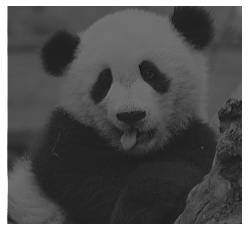

In [18]:
op = torch.nn.functional.conv2d(rgb_image.unsqueeze(0),sobelfilter,stride=3,padding=1)
ret = (op - op.min()).div(op.max() - op.min())
ret =ret.clamp(0., 1.).mul(255).int()
print(ret)

plt.imshow(ret.squeeze(),cmap='Greys_r') # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()

输入层：将每个像素作为一个特征节点输入网络。  
卷积层：由多个滤波器组合而成。  
池化层：把卷积结果降维。  
全局平均池化层：对生成的特征图取全局平均值，该层也可以用全连接网络来代替。  
输出层：网络需要将数据分成多少类，该层就有多少个节点，每个输出节点代表属于当前样本的该类型的概率。    

池化操作和卷积操作类似，具体介绍如下：    
卷积是把对应像素上的点相乘，然后相加；  
池化中只关心滤波器的尺寸，不关心内部的值（意思是滤波器没有特别指定的权重），算法是将滤波器映射区域内的像素点取平均值或者最大值。  
均值池化：Pytorch的平均池化是对所有的输入数据做均值计算。  
最大池化：在所有的像素点里面取最大值。  